<a href="https://www.kaggle.com/code/tanviriqbal/neural-network-session-1?scriptVersionId=270818011" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Neural Networks & Perceptron — Part A & Part B
Beginner-friendly lab:
- Part A (Perceptron from scratch + MLP with sklearn)
- Part B (NumPy NN intuition + PyTorch NN with custom forward and manual training loop on Fashion-MNIST)
Environment: Python 3.x, PyTorch installed./


## PART A

### AND Gate
<math>f(x1​,x2​)=1 only if x1​=1 AND x2​=1</math>
### OR Gate
<math>f(x1​,* x2​)=1 if x1​=1 OR x2​=1</math>
### XOR Gate
<math>f(x1​,x2​)=1 only when x1​!=x2​</math>


In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:

def plot_data(X, y, title="Data"):
    plt.figure(figsize=(5,5))
    pos = y==1
    neg = y==0
    plt.scatter(X[pos,0], X[pos,1], marker='o', label='class 1')
    plt.scatter(X[neg,0], X[neg,1], marker='x', label='class 0')
    plt.legend()
    plt.title(title)
    plt.grid(True)

# AND/OR datasets
AND_X = np.array([[0,0],[0,1],[1,0],[1,1]])
AND_y = np.array([0,0,0,1])

OR_X = AND_X.copy()
OR_y = np.array([0,1,1,1])

XOR_X = AND_X.copy()
XOR_y = np.array([0,1,1,0])


In [3]:

class Perceptron:
    def __init__(self, n_features, lr=0.6, epochs=20):
        self.w = np.zeros(n_features) # weights
        self.b = 0.0 # biases
        self.lr = lr # learning rate
        self.epochs = epochs # epoch

    def net_input(self, x):
        return np.dot(x, self.w) + self.b

    def predict(self, x):
        return (self.net_input(x) >= 0).astype(int)

    def fit(self, X, y, verbose=False):
        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                if update != 0.0:
                    self.w += update * xi
                    self.b += update
                    errors += 1
            if verbose:
                print(f"Epoch {epoch+1}/{self.epochs}, errors: {errors}")
        return self


### training

Epoch 1/10, errors: 2
Epoch 2/10, errors: 3
Epoch 3/10, errors: 3
Epoch 4/10, errors: 0
Epoch 5/10, errors: 0
Epoch 6/10, errors: 0
Epoch 7/10, errors: 0
Epoch 8/10, errors: 0
Epoch 9/10, errors: 0
Epoch 10/10, errors: 0
AND weights: [0.4 0.2] bias -0.4000000000000001
Epoch 1/10, errors: 2
Epoch 2/10, errors: 2
Epoch 3/10, errors: 1
Epoch 4/10, errors: 0
Epoch 5/10, errors: 0
Epoch 6/10, errors: 0
Epoch 7/10, errors: 0
Epoch 8/10, errors: 0
Epoch 9/10, errors: 0
Epoch 10/10, errors: 0
OR weights: [0.2 0.2] bias -0.2
Epoch 1/20, errors: 3
Epoch 2/20, errors: 3
Epoch 3/20, errors: 4
Epoch 4/20, errors: 4
Epoch 5/20, errors: 4
Epoch 6/20, errors: 4
Epoch 7/20, errors: 4
Epoch 8/20, errors: 4
Epoch 9/20, errors: 4
Epoch 10/20, errors: 4
Epoch 11/20, errors: 4
Epoch 12/20, errors: 4
Epoch 13/20, errors: 4
Epoch 14/20, errors: 4
Epoch 15/20, errors: 4
Epoch 16/20, errors: 4
Epoch 17/20, errors: 4
Epoch 18/20, errors: 4
Epoch 19/20, errors: 4
Epoch 20/20, errors: 4
XOR predictions: [1 1 0 0] 

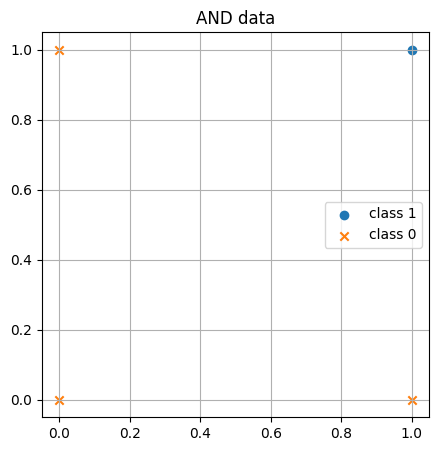

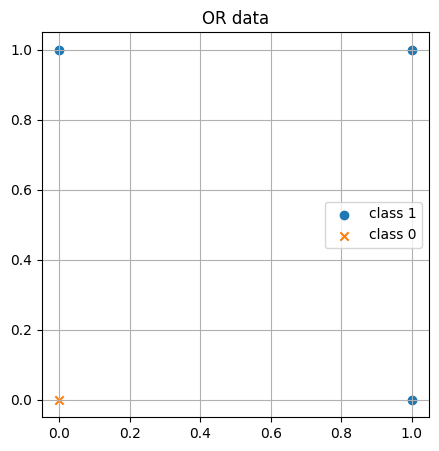

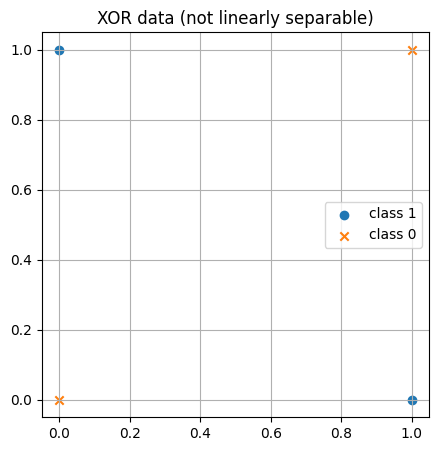

In [4]:

p = Perceptron(n_features=2, lr=0.2, epochs=10)
p.fit(AND_X, AND_y, verbose=True)
print("AND weights:", p.w, "bias", p.b)
plot_data(AND_X, AND_y, title="AND data")

p2 = Perceptron(n_features=2, lr=0.2, epochs=10)
p2.fit(OR_X, OR_y, verbose=True)
print("OR weights:", p2.w, "bias", p2.b)
plot_data(OR_X, OR_y, title="OR data")

# XOR test
p3 = Perceptron(n_features=2, lr=0.2, epochs=20)
p3.fit(XOR_X, XOR_y, verbose=True)
print("XOR predictions:", p3.predict(XOR_X), "true:", XOR_y)
plot_data(XOR_X, XOR_y, title="XOR data (not linearly separable)")


### 2 layer perceptron

Final Predictions (XOR):
[0 0] -> 0
[0 1] -> 0
[1 0] -> 1
[1 1] -> 1


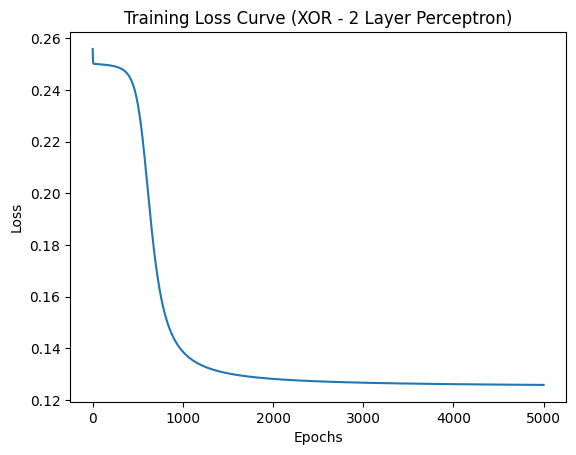

In [5]:
# Cell: 2-layer Perceptron (MLP) for XOR — from scratch using NumPy

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# XOR dataset (linearly inseparable)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Set random seed for reproducibility
np.random.seed(42)

# Network architecture
input_dim = 2
hidden_dim = 2   # 2 neurons in hidden layer (minimum needed for XOR)
output_dim = 1
lr = 0.5
epochs = 5000

# Initialize weights
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# Activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

losses = []

# Training loop (forward + backward)
for epoch in range(epochs): # 2
    # Forward pass
    z1 = X.dot(W1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (binary cross entropy)
    loss = np.mean((y - a2)**2)
    losses.append(loss)

    # Backpropagation
    d_a2 = -(y - a2)
    d_z2 = d_a2 * sigmoid_derivative(a2)
    d_W2 = a1.T.dot(d_z2)
    d_b2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = d_z2.dot(W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)
    d_W1 = X.T.dot(d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update weights
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

# Final predictions
preds = (a2 > 0.5).astype(int)

print("Final Predictions (XOR):")
for i in range(len(X)):
    print(f"{X[i]} -> {preds[i][0]}")

# Plot loss curve
plt.plot(losses)
plt.title("Training Loss Curve (XOR - 2 Layer Perceptron)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### MLP

In [6]:
## ON XOR data

sc = StandardScaler()
X_train_s = sc.fit_transform(XOR_X)
X_test_s = sc.transform(XOR_X)

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=1)
mlp.fit(XOR_X, XOR_y)
y_pred = mlp.predict(X_test_s)
print("Accuracy:", accuracy_score(XOR_y, XOR_y))
print(classification_report(XOR_y, XOR_y))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
## ON Iris Dataset

iris = load_iris()
X = iris.data
y = iris.target
# To keep it simple pick two classes or use all three (we'll use all)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500, random_state=1)
mlp.fit(X_train_s, y_train)
y_pred = mlp.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Experiments (try changing hidden layers)



In [8]:

mlp2 = MLPClassifier(hidden_layer_sizes=(50,50), activation='tanh', max_iter=500, random_state=1)
mlp2.fit(X_train_s, y_train)
print("Accuracy (bigger net):", accuracy_score(y_test, mlp2.predict(X_test_s)))


Accuracy (bigger net): 1.0


In [9]:
# Guided Exploration Experiments with MLPClassifier (Iris Dataset)

print("=== Baseline Model (from previous cell) ===")



=== Baseline Model (from previous cell) ===


In [10]:
# EXPERIMENT 1: INCREASE HIDDEN UNITS (Model Capacity ↑)
print("Hidden layer: (10,), Activation: relu, Max Iter: 500\n")
mlp_big = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=500, random_state=1)
import time
start = time.time()
mlp_big.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_big = mlp_big.predict(X_test_s)
print("Experiment 1 — Bigger Network (50 neurons, 1 layer):{}, duration::{}".format(accuracy_score(y_test, y_pred_big),dur))


Hidden layer: (10,), Activation: relu, Max Iter: 500

Experiment 1 — Bigger Network (50 neurons, 1 layer):1.0, duration::0.3267030715942383


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# EXPERIMENT 2: MULTIPLE HIDDEN LAYERS (Deeper Network)
mlp_deep = MLPClassifier(hidden_layer_sizes=(20, 10), activation='relu', max_iter=500, random_state=1)
start = time.time()
mlp_deep.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_deep = mlp_deep.predict(X_test_s)
print("Experiment 2 — Deeper Network (20,10):{}, duration::{}".format(accuracy_score(y_test, y_pred_deep),dur))


Experiment 2 — Deeper Network (20,10):1.0, duration::0.3005640506744385


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:

# EXPERIMENT 3: CHANGE ACTIVATION FUNCTION
mlp_tanh = MLPClassifier(hidden_layer_sizes=(10,), activation='tanh', max_iter=500, random_state=1, learning_rate_init=0.005)
start = time.time()
mlp_tanh.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_tanh = mlp_tanh.predict(X_test_s)
print("Experiment 3 — Activation: Tanh:{}, duration::{}".format(accuracy_score(y_test, y_pred_tanh),dur))


mlp_log = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=500, random_state=1)
start = time.time()
mlp_log.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_log = mlp_log.predict(X_test_s)
print("Experiment 3b — Activation: Logistic:{}, duration::{}".format(accuracy_score(y_test, y_pred_log), dur))


Experiment 3 — Activation: Tanh:0.9666666666666667, duration::0.19097304344177246
Experiment 3b — Activation: Logistic:0.9333333333333333, duration::0.21016716957092285


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:


# EXPERIMENT 5: LEARNING RATE IMPACT
mlp_fast_lr = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', learning_rate_init=0.1, max_iter=50, random_state=1)
start = time.time()
mlp_fast_lr.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_fast = mlp_fast_lr.predict(X_test_s)
print("Experiment 5 — High Learning Rate (0.1):{}, duration:{}".format(accuracy_score(y_test, y_pred_fast), dur))

mlp_slow_lr = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', learning_rate_init=0.0001, max_iter=50000, random_state=1)
start = time.time()
mlp_slow_lr.fit(X_train_s, y_train)
dur = time.time()-start
y_pred_slow = mlp_slow_lr.predict(X_test_s)
print("Experiment 5b — Low Learning Rate (0.0001):{}, duration::{}".format(accuracy_score(y_test, y_pred_slow), dur))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Experiment 5 — High Learning Rate (0.1):1.0, duration:0.03051900863647461
Experiment 5b — Low Learning Rate (0.0001):1.0, duration::1.335486888885498


In [14]:


print("\n--- Summary Guidance ---")
print("1) Bigger/deeper networks = more capacity → can learn complex patterns.")
print("2) Activation matters: ReLU is fast, tanh/logistic can work but might converge slower.")
print("3) Too few iterations = underfitting.")
print("4) Learning rate too high = unstable; too low = slow training.")



--- Summary Guidance ---
1) Bigger/deeper networks = more capacity → can learn complex patterns.
2) Activation matters: ReLU is fast, tanh/logistic can work but might converge slower.
3) Too few iterations = underfitting.
4) Learning rate too high = unstable; too low = slow training.


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


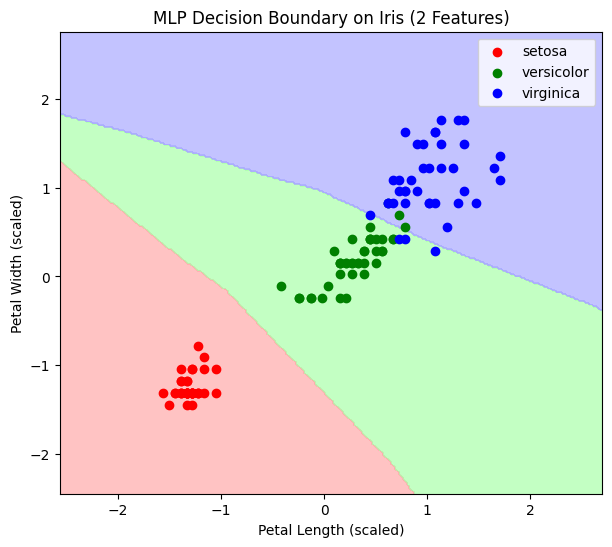

Visualization Model Accuracy: 1.0


In [15]:
# Cell A7 — Decision Boundary Visualization for MLP (Iris with 2 features)

from matplotlib.colors import ListedColormap

# Select only 2 features to visualize (Petal Length, Petal Width for example)
X_vis = X[:, [2, 3]]  # columns 2 and 3
y_vis = y

# Train-test split (for visualization only)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

# Scale
sc_vis = StandardScaler()
X_train_vis_s = sc_vis.fit_transform(X_train_vis)
X_test_vis_s = sc_vis.transform(X_test_vis)

# Train MLP (try a slightly bigger network for clearer boundaries)
mlp_vis = MLPClassifier(hidden_layer_sizes=(15,), activation='relu', max_iter=1000, random_state=1)
mlp_vis.fit(X_train_vis_s, y_train_vis)

# Create boundary grid
x_min, x_max = X_train_vis_s[:, 0].min() - 1, X_train_vis_s[:, 0].max() + 1
y_min, y_max = X_train_vis_s[:, 1].min() - 1, X_train_vis_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict over the grid
Z = mlp_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(7,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
for idx, class_name in enumerate(iris.target_names):
    plt.scatter(X_train_vis_s[y_train_vis == idx, 0],
                X_train_vis_s[y_train_vis == idx, 1],
                c=cmap_bold[idx], label=class_name)

plt.title("MLP Decision Boundary on Iris (2 Features)")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.legend()
plt.show()

# Print accuracy for completeness
y_pred_vis = mlp_vis.predict(X_test_vis_s)
print("Visualization Model Accuracy:", accuracy_score(y_test_vis, y_pred_vis))


## What is activation function??

## More common ones:
- ### Sigmoid activation function,
    - ### <math> σ(x)=1+e−x1​ </math>
    - moves from 0 to 1
    - good for binary classifiers 
- ### Hyperbolic tangent activation function (Tanh),
    - ### tanh(x)=<math> (e^x+e^−x)/(e^x−e^−x)</math>
	- Outputs values between –1 and +1.
    - Because output range is negative to positive (–1 to +1), it is zero-centered, which helps gradients to flow more evenly.
    - Usually gives somewhat faster convergence than sigmoid in many hidden-layer uses.
- ### Rectified Linear Unit (ReLU)
    - ### <math>f(x)=max(0,x)</math>
    - output is x if x > 0, otherwise 0.
    - Usually gives somewhat faster convergence than sigmoid in many hidden-layer uses.
    - faster convergence 